In [13]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
from scipy import stats
from scipy.stats import ranksums
from tqdm import tqdm
import seaborn as sns

filename = 'AMI_GSE66360_series_matrix.csv'


In [3]:
labels = pd.read_csv(filename,skiprows=58,nrows=1).to_numpy()
data = pd.read_csv(filename,skiprows=59,header=[0,1])
print(data.shape)
data.head()

#a.1 - 54675 genes are profiled
#a.2 - 99 samples total
#a.3 - 2 classes, Healthy - Myocradial



(54675, 100)


Class          H                                              \
      ID_REF GSM1620819 GSM1620820 GSM1620821 GSM1620822 GSM1620823   
0  1007_s_at   5.866378   4.948736   5.148384   5.064419   5.017833   
1    1053_at   8.225790   7.525865   7.764637   7.198461   7.831450   
2     117_at   6.179732   6.628137   5.859151   5.974135   6.793079   
3     121_at   6.179478   6.582889   6.602135   6.545905   5.911542   
4  1255_g_at   2.792048   2.695714   2.580181   2.712124   2.723687   

                                               ...          M             \
  GSM1620824 GSM1620825 GSM1620826 GSM1620827  ... GSM1620908 GSM1620909   
0   5.116154   5.431328   5.235271   5.773528  ...   5.419482   5.057716   
1   7.203592   7.694551   7.760259   8.279814  ...   7.226348   7.105538   
2   6.435229   6.320546   6.483590   6.387779  ...   6.789501   7.441940   
3   6.285420   6.562316   6.345888   6.272806  ...   6.513437   6.317523   
4   2.706684   2.674747   2.635150   2.696649  ...   2.924658   2.714103   

                                                                     \
  GSM1620910 GSM1620911 GSM1620912 GSM1620913 GSM1620914 GSM1620915   
0   5.996493   5.343133   5.558892   6.472517   5.678816   5.653286   
1   5.354105   8.271500   5.963346   8.261422   6.925753   7.918424   
2   7.026929   6.003973   7.474326   6.367759   6.835756   7.577035   
3   7.413453   6.809103   5.949091   6.440978   6.955883   6.499215   
4   3.635945   2.710944   2.979381   3.730139   2.914868   3.013901   

                         
  GSM1620916 GSM1620917  
0   6.013841   5.465334  
1   7.442701   9.225221  
2   7.147417   6.481128  
3   6.587065   6.897591  
4   2.729320   3.151449  

[5 rows x 100 columns]

In [4]:
unique, counts = np.unique(labels, return_counts=True)
dict(zip(unique, counts))
#a.3 - 50 H , 49 - M

{'Class': 1, 'H': 50, 'M': 49}

In [5]:
data.dropna().shape
#a.4 - 54628

(54628, 100)

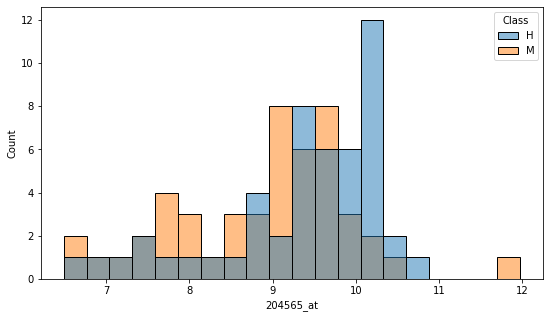

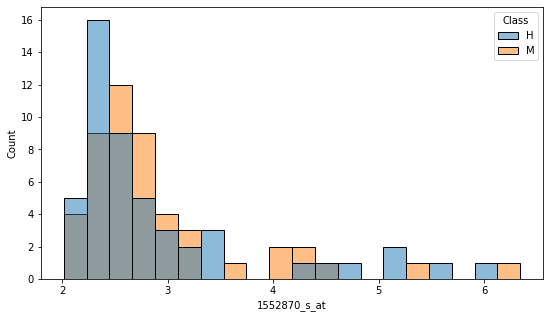

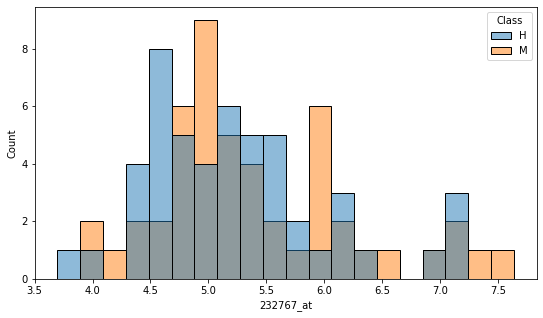

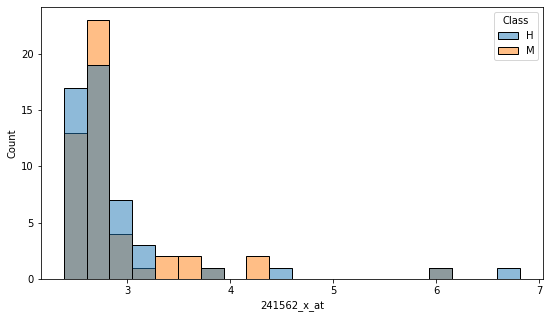

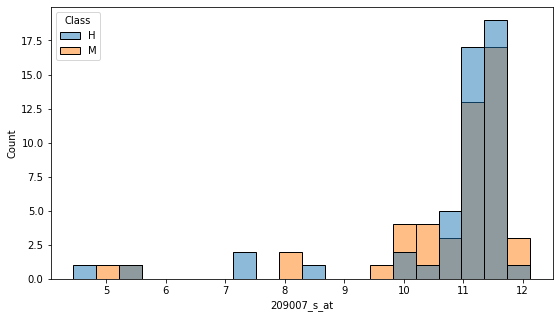

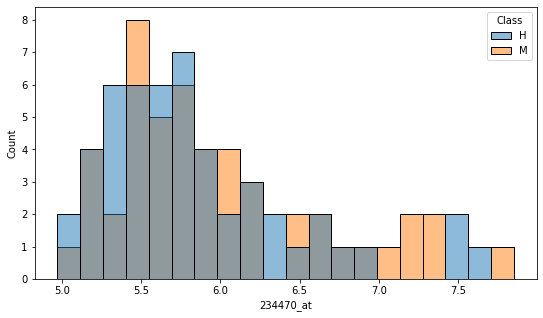

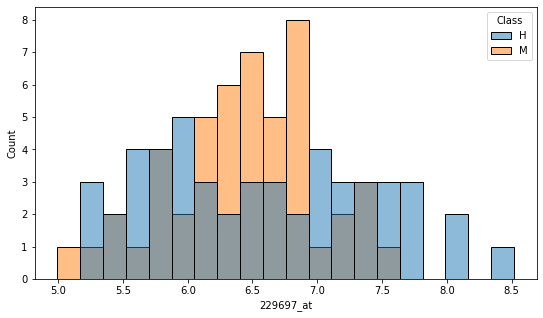

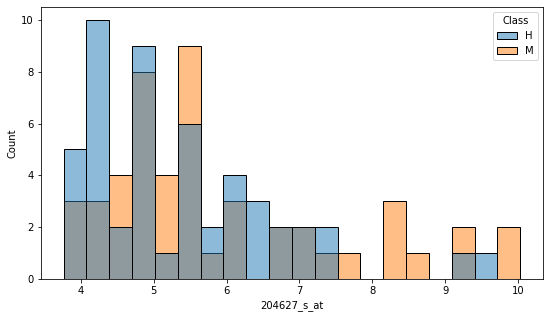

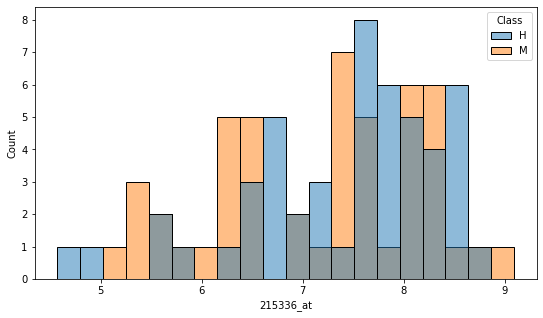

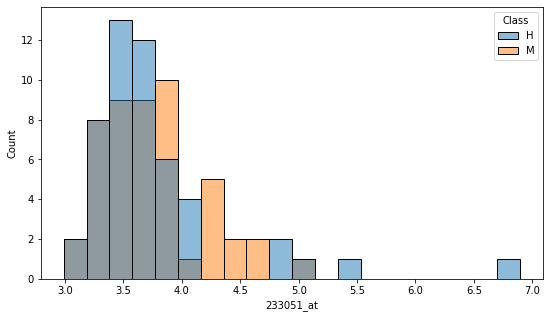

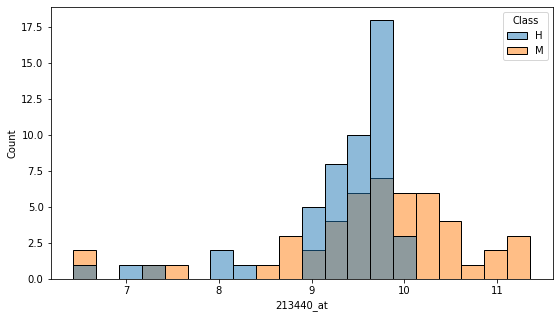

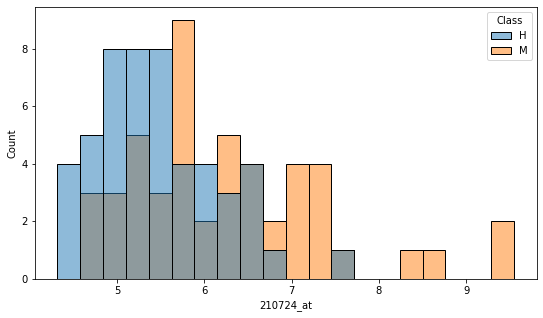

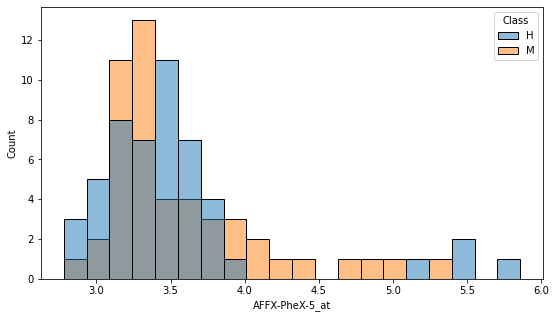

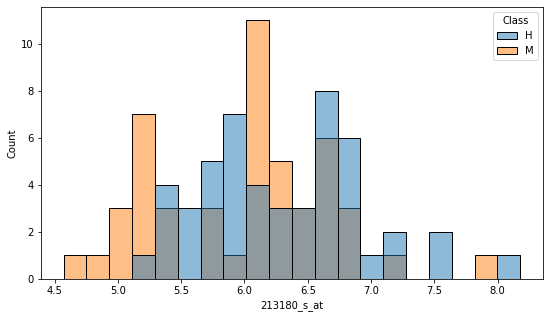

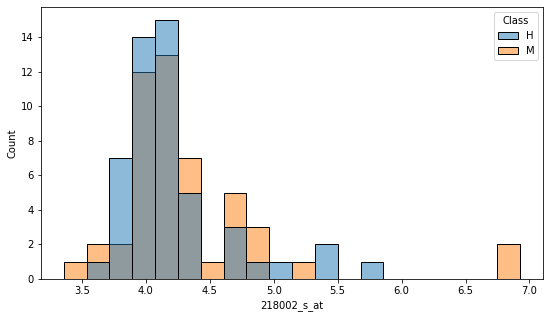

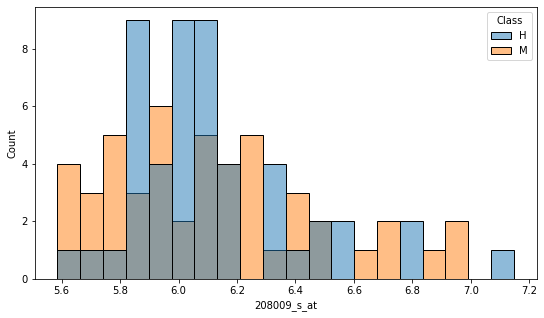

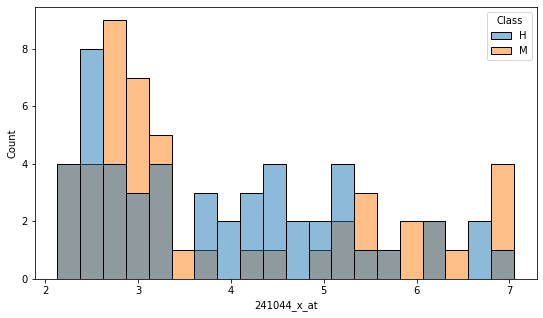

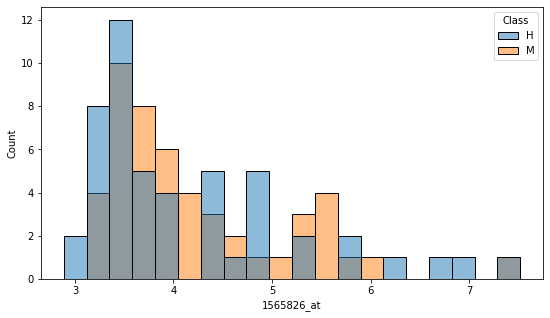

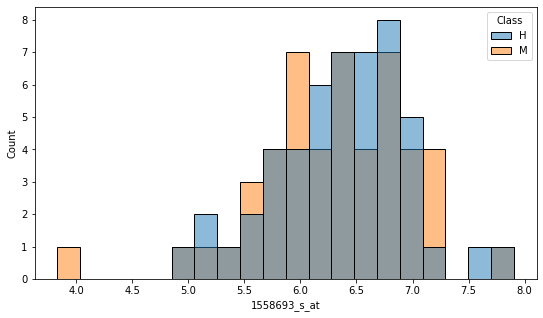

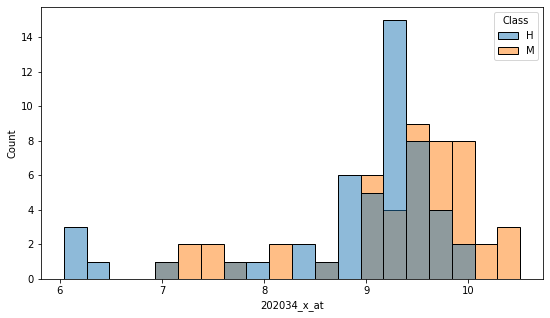

In [6]:
#a.5
data_np = data.dropna().reset_index(drop=True)
sample = data_np.sample(n=20)
for i in range(20):
    row = sample.iloc[i].reset_index()
    gene_name = row.reset_index().iloc[0,3]
    row = row.drop([0]).reset_index(drop=True)
    row.columns = ["Class","Genes",gene_name]
    plt.figure(figsize=(9,5))
    sns.histplot(data=row, x=gene_name, hue="Class",bins = 20)


#############
B
#############


B.1 - 2450

In [7]:
x = ((99+1)/2 * 49)
print(x)

2450.0


B.2 - maximal value is the sum of 51 to 99 where the gene represent H/M solely, meaning: 3675

In [8]:
sum = 0
for i in range(51,100):
    sum += i
print(sum)

3675


B.3 - under the null model, we equal probability for every configuration, and 49 samples that contain M, we need to choose 49 from 99 samples, meaning $P[RS(g))=c] = \dfrac{1}{{99 \choose 49}}$

B.4

$P[RS(g))=c-1] = \dfrac{1}{{99 \choose 49}}$ it has the same probability as B.3 since having the rank lowered by 1 meaning we swapped 2 ranks, the 51th and the 50th, so there is only one option, and we have the same as B.3
 
 $P[RS(g))=c-2] = \dfrac{1}{{99 \choose 49}} + \dfrac{1}{{99 \choose 49}}$ we have two permutations that can yield a c-2 result, is by switching 51th rank with 49th or switchin 50th rank with 52th rank.
 

#B.5

In [9]:
hst = np.zeros(data.shape[0])
for i in tqdm(range(data.shape[0])):
    row = data.iloc[i].reset_index()
    gene_name = row.reset_index().iloc[0,3]
    row = row.drop([0]).reset_index(drop=True)
    row.columns = ["Class","Genes",gene_name]
    row['ranked'] =  row.iloc[:,2].rank()
    hst[i] = row[row.Class == "M"].ranked.sum()

  0%|          | 0/54675 [00:00<?, ?it/s]

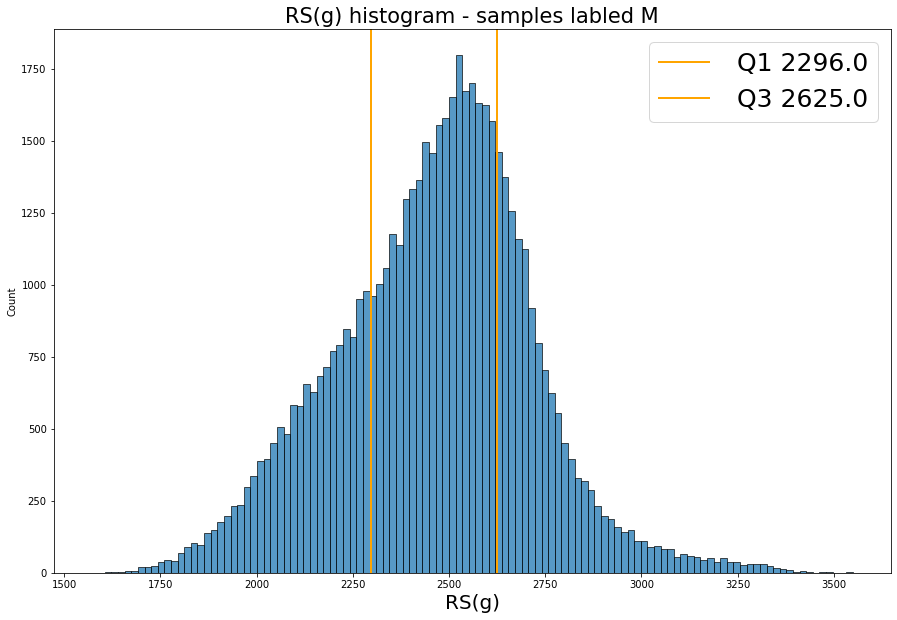

In [10]:
q75, q25 = np.percentile(hst, [75 ,25])
iqr = q75 - q25
fig, axes =### Question C plt.subplots(1,1, figsize=(15,10))
histPlot =sns.histplot(hst,ax=axes)
axes.set_title("RS(g) histogram - samples labled M",fontsize=21)
plt.axvline(np.percentile(hst, 25), color="orange",  label=" Q1 {:0.1f}".format(np.percentile(hst, 25)),linewidth=2)
plt.axvline(np.percentile(hst, 75), color="orange",  label=" Q3 {:0.1f}".format(np.percentile(hst, 75)),linewidth=2)
axes.set_xlabel("RS(g)",fontsize=20)
plt.legend(loc = "upper right",fontsize=25)

### Question C


we'll find all the genes with one-sided wrs and ttest below 0.07
For these genes we'll decide whether they are over or under expressed in M label samples according to the sum of their rank. Low rank == underexpresed, high rank == overexpressed
Their number will just be lower than , then simple using ttest and wrs directly should be ok because they will be ranked up at the list when we sort it in an asc order. 


In [14]:
labels = pd.read_csv(filename,skiprows=58,nrows=1).to_numpy()
data = pd.read_csv(filename,skiprows=60) 

In [15]:

labels_boolean = []
# Skipping the first item which is just class keyword
for l in labels[0][1:]:
    if l =='H':
        labels_boolean.append(False)
    else:
        labels_boolean.append(True)


# print(labels_boolean)
# print(np.bitwise_not(labels_boolean))

ttest_underexpressed = []
wrs_underexpressed = [] 

for gene in tqdm(range(data.shape[0])):
#   Testing underexpressed
    M_labels = data.iloc[gene,1:][labels_boolean]
    H_labels = data.iloc[gene,1:][np.bitwise_not(labels_boolean)]
    one_sided_ttest = stats.ttest_ind(M_labels,H_labels)[1] /2 
    one_sided_wrs = ranksums(M_labels,H_labels)[1] /2 

    over_under = list(zip(data.iloc[gene,1:], labels_boolean))
    over_under.sort(key = lambda x: x[0])
    expression_level = 0
    for i in range(len(over_under)):
        if over_under[i][1]:
            expression_level += i
            
    if one_sided_ttest < 0.07:
        ttest_underexpressed.append({'gene_index': gene,'gene_name':  data.iloc[gene,0], 'ttest_value': one_sided_ttest, 'expression_level': expression_level})
    if one_sided_wrs < 0.07:
        wrs_underexpressed.append({'gene_index': gene,'gene_name':  data.iloc[gene,0], 'wrs_value': one_sided_wrs, 'expression_level': expression_level})
        


100%|██████████| 54675/54675 [01:25<00:00, 636.33it/s]


In [16]:
over_expressed_genes_ttest = 0
for res in ttest_underexpressed:
    if res['expression_level'] > 2525:
        over_expressed_genes_ttest += 1

print('number of over expressed genes in ttest: ', over_expressed_genes_ttest)
print('number of under expressed genes in ttest: ', len(ttest_underexpressed) - over_expressed_genes_ttest)
print('================')        
over_expressed_genes_wrs = 0
for res in wrs_underexpressed:
    if res['expression_level'] > 2525:
        over_expressed_genes_wrs += 1

print('number of over expressed genes in wrs: ',over_expressed_genes_wrs)
print('number of under expressed genes in wrs: ',len(wrs_underexpressed) - over_expressed_genes_wrs)


number of over expressed genes in ttest:  8430
number of under expressed genes in ttest:  8726
number of over expressed genes in wrs:  10800
number of under expressed genes in wrs:  10675


### Question D

##### 1

In [17]:
wrs_underexpressed.sort(key = lambda x: x['expression_level'])

In [18]:
under_80_expressed = wrs_underexpressed[:80]
over_80_expressed = wrs_underexpressed[-80:]
wrs_160_D = under_80_expressed + over_80_expressed
indices = [d['gene_index'] for d in wrs_160_D]
coorelations = data.iloc[indices].drop(columns=['ID_REF']).T.corr(method='kendall')
coorelations


,35679,43345,16424,52707,28089,29428,54556,16437,35143,42227,...,49352,50528,13021,26489,13334,13335,53304,14069,25540,18284
35679,1.000000,0.322614,0.437229,0.397650,0.454958,0.342816,0.440528,0.384948,0.464853,0.302000,...,-0.310245,-0.372913,-0.367965,-0.274789,-0.275613,-0.349825,-0.387343,-0.489177,-0.495362,-0.425273
43345,0.322614,1.000000,0.459905,0.497835,0.485879,0.357246,0.482993,0.424536,0.358895,0.521748,...,-0.231499,-0.192744,-0.155638,-0.243867,-0.280973,-0.293342,-0.339930,-0.311482,-0.328386,-0.291280
16424,0.437229,0.459905,1.000000,0.539889,0.645022,0.415791,0.614925,0.581237,0.489177,0.398062,...,-0.233972,-0.283447,-0.248815,-0.263657,-0.267780,-0.300763,-0.351474,-0.458256,-0.452072,-0.324263
52707,0.397650,0.497835,0.539889,1.000000,0.612863,0.453721,0.601732,0.483918,0.504020,0.444238,...,-0.252113,-0.229025,-0.225727,-0.253762,-0.272727,-0.313131,-0.386106,-0.421150,-0.437229,-0.330035
28089,0.454958,0.485879,0.645022,0.612863,1.000000,0.400536,0.910534,0.554433,0.569573,0.464440,...,-0.259122,-0.292105,-0.246753,-0.260771,-0.271490,-0.309421,-0.328798,-0.462791,-0.455782,-0.311482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13335,-0.349825,-0.293342,-0.300763,-0.313131,-0.309421,-0.373737,-0.301587,-0.318969,-0.317666,-0.365079,...,0.460730,0.448361,0.447537,0.492888,0.783137,1.000000,0.531231,0.392290,0.386931,0.408369
53304,-0.387343,-0.339930,-0.351474,-0.386106,-0.328798,-0.347763,-0.319316,-0.305361,-0.419501,-0.329210,...,0.576582,0.460317,0.562564,0.534529,0.522160,0.531231,1.000000,0.457019,0.448361,0.433519
14069,-0.489177,-0.311482,-0.458256,-0.421150,-0.462791,-0.321789,-0.421150,-0.462474,-0.369615,-0.312307,...,0.400536,0.450010,0.554731,0.442589,0.373325,0.392290,0.457019,1.000000,0.851165,0.617811
25540,-0.495362,-0.328386,-0.452072,-0.437229,-0.455782,-0.356009,-0.425685,-0.439794,-0.368378,-0.338281,...,0.450423,0.484230,0.555968,0.466089,0.386106,0.386931,0.448361,0.851165,1.000000,0.664399


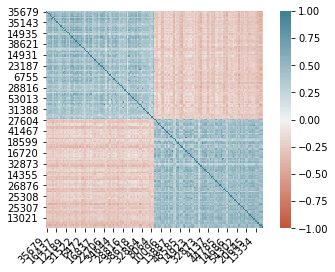

In [19]:
ax = sns.heatmap(
    coorelations, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

##### 2

under null value model wheere the genee should be independent of each other then expected value for kendell correlation is 0
But now we got the overexpress and underexressed mixed together in correaltion then the sum of the meanmean of all coorelations is not getting far from 0 sice we took the edges of the over and under expressions



In [20]:
print(coorelations.mean())


35679    0.042302
43345    0.086760
16424    0.109514
52707    0.103548
28089    0.134787
           ...   
13335    0.073338
53304    0.072915
14069    0.044477
25540    0.050813
18284    0.091442
Length: 160, dtype: float64


In [21]:
print(coorelations.mean().mean())

0.09016181231892699


##### 3



Lets find the genes with the most significat coorrelation 


In [22]:
c = coorelations.abs()
s = c.unstack()
so = s.sort_values(kind="quicksort")
so
print(so[-200:-160])

19235  13683    0.727760
13683  19235    0.727760
11446  12189    0.730777
12189  11446    0.730777
18284  20787    0.735312
20787  18284    0.735312
31217  54559    0.759225
54559  31217    0.759225
10979  10921    0.764045
10921  10979    0.764045
13335  13334    0.783137
13334  13335    0.783137
41186  23187    0.792208
23187  41186    0.792208
54302  13268    0.800866
13268  54302    0.800866
25528  11945    0.813647
11945  25528    0.813647
57     56       0.821068
56     57       0.821068
6756   6755     0.837147
6755   6756     0.837147
20225  21232    0.838796
21232  20225    0.838796
25540  14069    0.851165
14069  25540    0.851165
32947  28874    0.856524
28874  32947    0.856524
33468  28874    0.861060
28874  33468    0.861060
14067  31011    0.861884
31011  14067    0.861884
14514  54329    0.886621
54329  14514    0.886621
32947  33468    0.905586
33468  32947    0.905586
32654  30506    0.906411
30506  32654    0.906411
54556  28089    0.910534
28089  54556    0.910534


it seems like there are a few genes with very very high correlation.
so there are co expressed 
lets take for instance the pairs 


In [23]:
data.iloc[[28089,54556]]

,ID_REF,GSM1620819,GSM1620820,GSM1620821,GSM1620822,GSM1620823,GSM1620824,GSM1620825,GSM1620826,GSM1620827,...,GSM1620908,GSM1620909,GSM1620910,GSM1620911,GSM1620912,GSM1620913,GSM1620914,GSM1620915,GSM1620916,GSM1620917
28089,218805_at,12.665831,12.697012,12.554381,12.723016,12.651866,12.769966,12.300291,12.410391,12.273510,...,11.522578,11.512471,8.144844,10.238530,7.391334,5.473397,10.639817,10.913550,12.228832,11.085965
54556,64064_at,12.536551,12.646634,12.453288,12.618003,12.523136,12.667282,12.141603,12.336620,12.217065,...,11.149027,11.216491,8.282983,10.077849,7.390902,6.050309,10.223712,10.567088,12.095583,10.721204


{'gene_index': 54556,
  'gene_name': '64064_at',
  'wrs_value': 5.857870407920106e-09,
  'expression_level': 1586},
{'gene_index': 28089,
  'gene_name': '218805_at',
  'wrs_value': 4.968344382221747e-09,
  'expression_level': 1582}


##### 5



The advantages of computing the co-expression for a values is that we will have a better understanding of the distribution of co-expression along 50k values rather than only the chosen 160 values with low p-value . 
This might give us better indication of whehther the numbers we are seeing are significat or just something very normal.


##### 6

In [24]:
only_M = data.iloc[indices].drop(columns=['ID_REF']).T.iloc[labels_boolean].T
only_M

,GSM1620832,GSM1620833,GSM1620834,GSM1620835,GSM1620836,GSM1620837,GSM1620838,GSM1620839,GSM1620840,GSM1620841,...,GSM1620908,GSM1620909,GSM1620910,GSM1620911,GSM1620912,GSM1620913,GSM1620914,GSM1620915,GSM1620916,GSM1620917
35679,5.202540,6.425417,5.284998,6.074613,6.180049,5.847592,5.543240,5.277372,6.396657,6.464573,...,5.246430,6.512634,7.324613,5.843145,5.468881,4.819285,6.161099,5.293419,7.521144,6.985338
43345,7.351135,10.093916,8.294668,10.059185,9.564276,9.736212,8.923304,8.401196,10.247494,10.577165,...,9.227003,8.803181,8.735389,7.697609,6.117808,7.635899,6.758414,6.010530,9.343903,7.674686
16424,7.348613,9.794741,8.162347,9.078899,11.317455,11.501272,8.442811,8.189246,10.292262,10.850360,...,7.987843,7.669913,5.242480,5.178211,8.011860,7.502898,7.619756,4.178306,8.252575,8.899091
52707,9.313578,9.757111,8.231107,10.008571,9.299648,9.577473,8.621952,8.892336,9.968791,9.475996,...,6.900312,8.545654,7.044752,8.615354,8.015828,7.656104,8.781724,8.375186,10.214691,8.285006
28089,10.770560,11.910944,9.926306,12.264906,12.381899,11.550541,11.350366,11.812305,12.666907,12.302813,...,11.522578,11.512471,8.144844,10.238530,7.391334,5.473397,10.639817,10.913550,12.228832,11.085965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13335,6.789445,7.551829,8.841972,9.076092,10.661127,11.268014,8.759963,6.943844,5.348359,6.502498,...,7.700807,9.521289,6.633607,6.142913,6.688749,7.486187,6.186165,7.622459,7.918264,5.678032
53304,8.799344,8.339174,9.237855,10.060879,9.158563,11.492864,9.220988,9.046332,6.347984,7.263611,...,8.486868,10.170367,7.415770,9.058584,10.010674,9.220180,8.367315,8.750525,7.368449,7.684148
14069,10.661508,10.131833,12.328122,9.941437,9.641036,9.430327,11.857806,11.807597,8.152994,8.760742,...,10.199732,11.227899,9.201726,12.191446,9.868114,8.993731,8.935078,11.188893,8.838410,8.867182
25540,9.941481,9.445015,11.755102,9.199571,8.863167,8.796491,11.201106,11.250787,7.283380,8.020355,...,9.558230,10.569247,8.198777,11.565140,6.903139,6.281228,8.079848,10.542668,7.553786,7.925026


In [25]:
coorelations_M_only = only_M.T.corr(method='kendall')

In [26]:
coorelations_M_only

,35679,43345,16424,52707,28089,29428,54556,16437,35143,42227,...,49352,50528,13021,26489,13334,13335,53304,14069,25540,18284
35679,1.000000,0.253401,0.129252,0.122449,0.151361,0.044218,0.146259,0.161702,0.273810,0.146259,...,0.054422,0.010204,-0.030612,-0.005102,-0.059524,-0.062925,-0.153061,-0.195578,-0.166667,-0.263605
43345,0.253401,1.000000,0.505102,0.474490,0.568027,0.263605,0.525510,0.423830,0.360544,0.515306,...,-0.022109,0.144558,0.059524,0.010204,0.102041,0.098639,-0.083333,-0.306122,-0.250000,-0.210884
16424,0.129252,0.505102,1.000000,0.486395,0.518707,0.295918,0.452381,0.503830,0.154762,0.370748,...,0.091837,0.173469,0.081633,-0.001701,0.096939,0.056122,-0.034014,-0.352041,-0.295918,-0.134354
52707,0.122449,0.474490,0.486395,1.000000,0.576531,0.316327,0.540816,0.405107,0.324830,0.435374,...,-0.020408,0.142857,0.057823,-0.062925,0.025510,-0.015306,-0.112245,-0.314626,-0.268707,-0.168367
28089,0.151361,0.568027,0.518707,0.576531,1.000000,0.260204,0.869048,0.474894,0.360544,0.437075,...,0.049320,0.137755,0.045918,-0.054422,0.074830,0.057823,-0.049320,-0.377551,-0.314626,-0.173469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13335,-0.062925,0.098639,0.056122,-0.015306,0.057823,-0.110544,0.107143,-0.117447,0.064626,-0.124150,...,0.290816,0.280612,0.426871,0.425170,0.812925,1.000000,0.389456,0.204082,0.171769,0.282313
53304,-0.153061,-0.083333,-0.034014,-0.112245,-0.049320,-0.122449,-0.013605,-0.122553,-0.168367,-0.142857,...,0.537415,0.394558,0.537415,0.498299,0.386054,0.389456,1.000000,0.290816,0.244898,0.270408
14069,-0.195578,-0.306122,-0.352041,-0.314626,-0.377551,-0.219388,-0.273810,-0.294468,-0.095238,-0.318027,...,0.079932,0.083333,0.297619,0.255102,0.204082,0.204082,0.290816,1.000000,0.865646,0.540816
25540,-0.166667,-0.250000,-0.295918,-0.268707,-0.314626,-0.217687,-0.234694,-0.238298,-0.066327,-0.329932,...,0.064626,0.102041,0.282313,0.256803,0.209184,0.171769,0.244898,0.865646,1.000000,0.562925


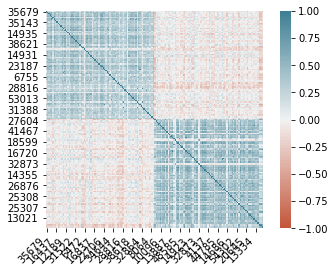

In [27]:
ax = sns.heatmap(
    coorelations_M_only, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [28]:
print(coorelations_M_only.mean())

35679    0.066297
43345    0.190854
16424    0.175559
52707    0.170497
28089    0.218979
           ...   
13335    0.176758
53304    0.141011
14069    0.009289
25540    0.033970
18284    0.077222
Length: 160, dtype: float64


In [29]:
print(coorelations_M_only.mean().mean())

0.1414766908372432


In [30]:
c = coorelations_M_only.abs()
s = c.unstack()
so = s.sort_values(kind="quicksort")
so
print(so[-200:-160])

20225  32213    0.753401
32213  20225    0.753401
23187  41186    0.763605
41186  23187    0.763605
6755   6756     0.765306
25068  48585    0.765306
6756   6755     0.765306
48585  25068    0.765306
14850  20708    0.767007
20708  14850    0.767007
11411  16720    0.773810
16720  11411    0.773810
21232  32213    0.784014
32213  21232    0.784014
57     56       0.790816
56     57       0.790816
32947  28874    0.797619
28874  32947    0.797619
25528  11945    0.807823
11945  25528    0.807823
13335  13334    0.812925
13334  13335    0.812925
28874  33468    0.818027
33468  28874    0.818027
13268  54302    0.831633
54302  13268    0.831633
30506  32654    0.843537
32654  30506    0.843537
33468  32947    0.860544
32947  33468    0.860544
21232  20225    0.863946
20225  21232    0.863946
14069  25540    0.865646
25540  14069    0.865646
28089  54556    0.869048
54556  28089    0.869048
31011  14067    0.891156
14067  31011    0.891156
14514  54329    0.906463
54329  14514    0.906463


We can now see accoridng to the average that the correlation is higher, this makes a lot since sense we are now onnly looking at the correlation of people who were tagged with M + genese that initially had high correlation with tagging M due to very low P-value

#e.1

In [31]:
labels_boolean = []
# Skipping the first item which is just class keyword
for l in labels[0][1:]:
    if l =='H':
        labels_boolean.append(False)
    else:
        labels_boolean.append(True)


# print(labels_boolean)
# print(np.bitwise_not(labels_boolean))

ttest_pval = []
wrs_pval = [] 

for gene in tqdm(range(data.shape[0])):
#   Testing underexpressed
    M_labels = data.iloc[gene,1:][labels_boolean]
    H_labels = data.iloc[gene,1:][np.bitwise_not(labels_boolean)]
    one_sided_ttest, pvalue_ttest = stats.ttest_ind(M_labels,H_labels); pvalue_ttest/=2 
    one_sided_wrs, pvalue_wrs = ranksums(M_labels,H_labels); pvalue_wrs/=2

    over_under = list(zip(data.iloc[gene,1:], labels_boolean))
    over_under.sort(key = lambda x: x[0])
    expression_level = 0
    for i in range(len(over_under)):
        if over_under[i][1]:
            expression_level += i
    if one_sided_ttest < 0:
        pvalue_ttest = 1 - pvalue_ttest
    if one_sided_wrs <0:
        pvalue_wrs = 1 - pvalue_wrs
    ttest_pval.append((data.iloc[gene,0],one_sided_ttest,pvalue_ttest))
    wrs_pval.append((data.iloc[gene,0],one_sided_wrs,pvalue_wrs))
    

100%|██████████| 54675/54675 [01:26<00:00, 629.23it/s]


In [32]:
def calc_fdr(p_vals):
    ranked_p_values = stats.rankdata(p_vals)
    fdr = p_vals * len(p_vals) / ranked_p_values
    fdr[fdr > 1] = 1
    return fdr

In [33]:
ttest_pval = (pd.DataFrame(ttest_pval,columns = ["gene","statistic","p_value"])).sort_values(by = "p_value")
wrs_pval = (pd.DataFrame(wrs_pval,columns = ["gene","statistic","p_value"])).sort_values(by = "p_value")
ttest_pval["Ranks"]= ttest_pval.p_value * ttest_pval.shape[0]
ttest_pval["Real_Ranks"] = ttest_pval.p_value.rank(method='max')
ttest_pval["FDR"] = calc_fdr(ttest_pval.p_value)
wrs_pval["Ranks"]= wrs_pval.p_value * wrs_pval.shape[0]
wrs_pval["Real_Ranks"] = wrs_pval.p_value.rank(method='max')
wrs_pval["FDR"] = calc_fdr(wrs_pval.p_value)


FDR =0.05 with T-test is: 2099
FDR =0.01 with T-test is: 1305
FDR =0.005 with T-test is: 1104


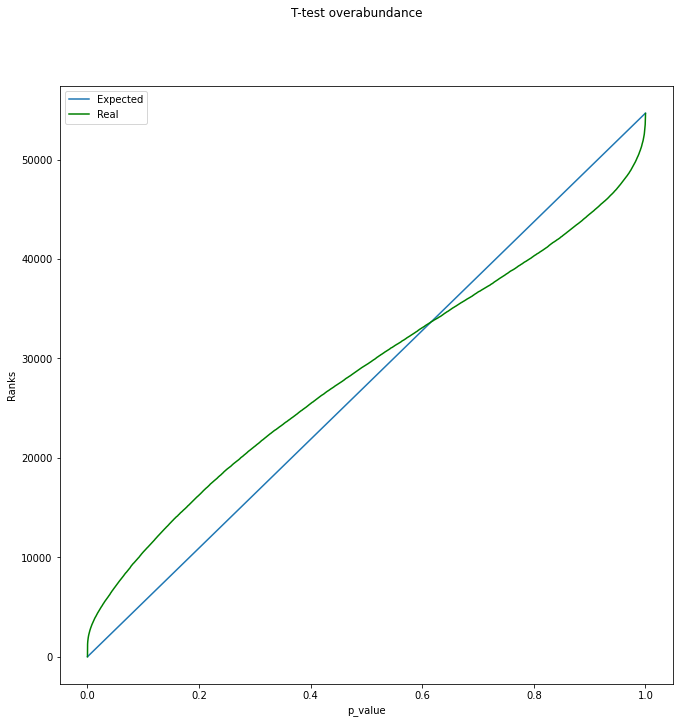

In [34]:
plt.figure(figsize = (11,11))
plt.suptitle('T-test overabundance')
sns.lineplot(data=ttest_pval, x="p_value", y="Ranks",label = "Expected")
sns.lineplot(data=ttest_pval, x="p_value", y="Real_Ranks",color='green',label = "Real")
plt.legend()
print("FDR =0.05 with T-test is: {0}".format(ttest_pval[ttest_pval.FDR <= 0.05].count()[0]))
print("FDR =0.01 with T-test is: {0}".format(ttest_pval[ttest_pval.FDR <= 0.01].count()[0]))
print("FDR =0.005 with T-test is: {0}".format(ttest_pval[ttest_pval.FDR <= 0.005].count()[0]))

FDR =0.05 with T-test is: 2811
FDR =0.01 with T-test is: 1604
FDR =0.005 with T-test is: 1325


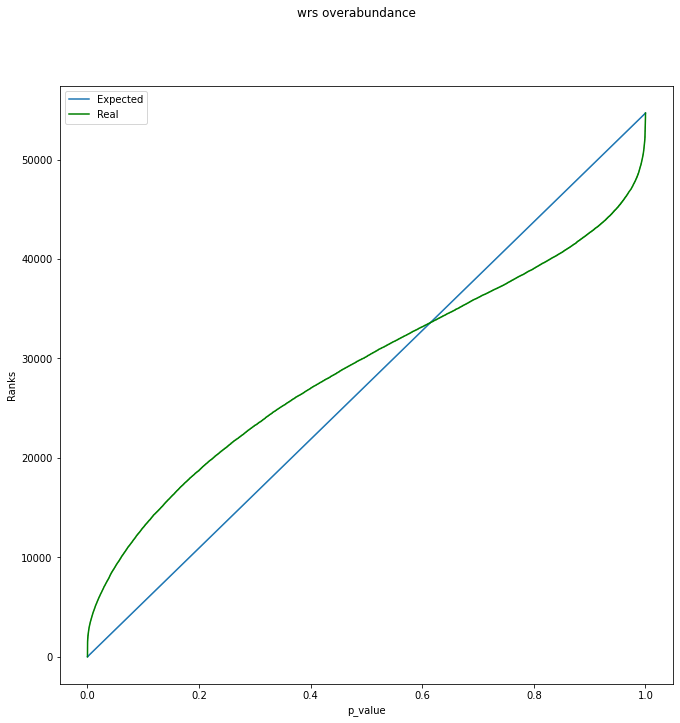

In [35]:
plt.figure(figsize = (11,11))
plt.suptitle('wrs overabundance')
sns.lineplot(data=wrs_pval, x="p_value", y="Ranks",label = "Expected")
sns.lineplot(data=wrs_pval, x="p_value", y="Real_Ranks",color='green',label = "Real")
plt.legend()
print("FDR =0.05 with T-test is: {0}".format(wrs_pval[wrs_pval.FDR <= 0.05].count()[0]))
print("FDR =0.01 with T-test is: {0}".format(wrs_pval[wrs_pval.FDR <= 0.01].count()[0]))
print("FDR =0.005 with T-test is: {0}".format(wrs_pval[wrs_pval.FDR <= 0.005].count()[0]))

In [36]:
genes = np.array([data.iloc[30506][0],data.iloc[32654][0],data.iloc[28089][0]])
print("genes: {0}, {1}, {2}".format(genes[0],genes[1],genes[2]))


genes: 221223_x_at, 223377_x_at, 218805_at


Text(158.09375, 0.5, 'Gene')

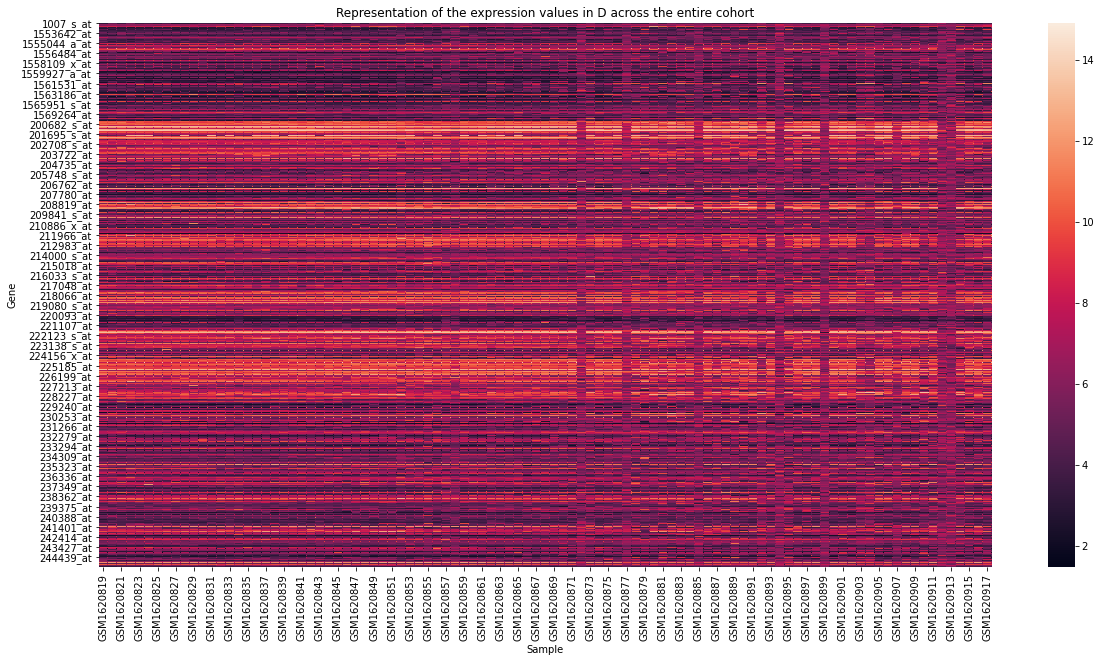

In [37]:
#e.3
spec_genes = np.array(data.iloc[:,0])
dMat = data.iloc[np.where(data["ID_REF"].isin(spec_genes))[0],:]
dMat  = dMat .set_index(dMat .iloc[:,0].name)
dMat  = dMat.loc[spec_genes]
plt.figure(figsize = (20,10))
sns.heatmap(dMat)
plt.title("Representation of the expression values in D across the entire cohort")
plt.xlabel("Sample")
plt.ylabel("Gene")
